# Filtering out clutter

Isolated pixels with precipitation value are more likely to be clutter than actual rain. A filter can be applied to the image to removed isolated rain pixels. This will improve the quality of the rain/no rain labels as a single isolated rainy pixel will not result in the image being labeld as rainy. Furthermore this method hopefully removes high intensity isolated clutter. After applying this filter to dataset, the ship tracks should be less clear.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

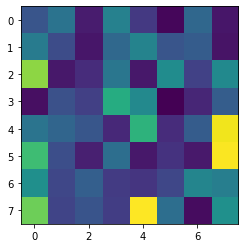

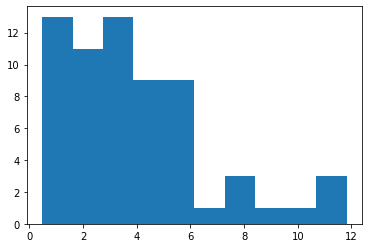

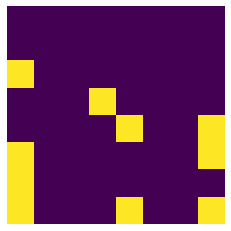

kernel: 
 [[-1. -1. -1.]
 [-1.  1. -1.]
 [-1. -1. -1.]]


In [139]:
np.random.seed(4)
img = np.random.gamma(2,2, size=(8,8))
plt.imshow(img)
plt.show()
plt.hist(img.ravel())
plt.show()

# Set pixels above certain value to rainy
# On actual data this threshold is > 0.3mm
rain = (img > 6).astype('uint8')
# Create kernel that checks if pixel has no neighbours
kernel_size=3
kernel = -np.ones((kernel_size,kernel_size))
kernel[1,1] = 1
plt.imshow(rain)
plt.axis('off')
plt.show()
print('kernel: \n', kernel)

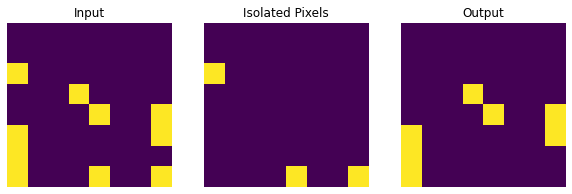

In [140]:
# Move kernel over image
isolated_pixels = cv2.morphologyEx(rain, cv2.MORPH_HITMISS, kernel)
# Remove isolated pixels 
output = rain * np.logical_not(isolated_pixels)


plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(rain)
plt.axis('off')
plt.title('Input')
plt.subplot(1,3,2)
plt.imshow(isolated_pixels)
plt.axis('off')
plt.title('Isolated Pixels')
plt.subplot(1,3,3)
plt.imshow(output)
plt.axis('off')
plt.title('Output')
plt.show()